In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet

In [62]:
tickerSymbol = 'AAPl'   #EMG.L
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(interval='1d',start='2017-4-1',end='2022-6-1',)
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-03 00:00:00-04:00,33.768542,33.864879,33.613456,33.766190,79942800,0.0,0.0
2017-04-04 00:00:00-04:00,33.660443,34.045805,33.641644,34.017609,79565600,0.0,0.0
2017-04-05 00:00:00-04:00,33.888372,34.179745,33.792031,33.841377,110871600,0.0,0.0
2017-04-06 00:00:00-04:00,33.904823,33.958870,33.707443,33.756790,84596000,0.0,0.0
2017-04-07 00:00:00-04:00,33.773240,33.878978,33.665152,33.681599,66688800,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-24 00:00:00-04:00,140.381795,141.538271,136.912382,139.933167,104132700,0.0,0.0
2022-05-25 00:00:00-04:00,138.009041,141.358824,137.919318,140.092697,92482700,0.0,0.0
2022-05-26 00:00:00-04:00,136.972191,143.901053,136.722951,143.342758,90601500,0.0,0.0


In [68]:
tickerDfResample = pd.DataFrame(tickerDf.resample('1d').sum())
tickerDfResample[tickerDfResample == 0] = None
tickerDfResample = tickerDfResample.interpolate(method='pad')
tickerDfResample
#tickerDfResample.index = pd.to_datetime(tickerDfResample.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')
#tickerDfResample
#tickerDfResample = tickerDf
#tickerDfResample = tickerDfResample.reset_index()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-03 00:00:00-04:00,33.768542,33.864879,33.613456,33.766190,79942800.0,NaN,NaN
2017-04-04 00:00:00-04:00,33.660443,34.045805,33.641644,34.017609,79565600.0,NaN,NaN
2017-04-05 00:00:00-04:00,33.888372,34.179745,33.792031,33.841377,110871600.0,NaN,NaN
2017-04-06 00:00:00-04:00,33.904823,33.958870,33.707443,33.756790,84596000.0,NaN,NaN
2017-04-07 00:00:00-04:00,33.773240,33.878978,33.665152,33.681599,66688800.0,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-27 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0
2022-05-28 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0
2022-05-29 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0


In [69]:
tickerDfResample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1885 entries, 2017-04-03 00:00:00-04:00 to 2022-05-31 00:00:00-04:00
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1885 non-null   float64
 1   High          1885 non-null   float64
 2   Low           1885 non-null   float64
 3   Close         1885 non-null   float64
 4   Volume        1885 non-null   float64
 5   Dividends     1847 non-null   float64
 6   Stock Splits  639 non-null    float64
dtypes: float64(7)
memory usage: 117.8 KB


In [70]:
first_diff = tickerDfResample.Close.values[1:]-tickerDfResample.Close.values[:-1]
first_diff = np.concatenate([first_diff,[0]])
tickerDfResample['FirstDifference'] = first_diff
tickerDfResample['PercentageChange'] = tickerDfResample.Close.pct_change().fillna(0) #  "by what percentage did previous value change to get to current value"current value - previous value / previous value = pct change
#tickerDfResample = np.log(tickerDfResample)
tickerDfResample

,Open,High,Low,Close,Volume,Dividends,Stock Splits,FirstDifference,PercentageChange
Date,,,,,,,,,
2017-04-03 00:00:00-04:00,33.768542,33.864879,33.613456,33.766190,79942800.0,NaN,NaN,0.251419,0.000000
2017-04-04 00:00:00-04:00,33.660443,34.045805,33.641644,34.017609,79565600.0,NaN,NaN,-0.176231,0.007446
2017-04-05 00:00:00-04:00,33.888372,34.179745,33.792031,33.841377,110871600.0,NaN,NaN,-0.084587,-0.005181
2017-04-06 00:00:00-04:00,33.904823,33.958870,33.707443,33.756790,84596000.0,NaN,NaN,-0.075191,-0.002500
2017-04-07 00:00:00-04:00,33.773240,33.878978,33.665152,33.681599,66688800.0,NaN,NaN,0.000000,-0.002227
...,...,...,...,...,...,...,...,...,...
2022-05-27 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0,0.000000,0.040757
2022-05-28 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0,0.000000,0.000000
2022-05-29 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500.0,0.23,4.0,0.000000,0.000000


In [71]:
(34.017609 - 33.766190 )/ 33.76619

0.007445880035621386

In [72]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P_value: ",dftest[1])
    print("3. num_lags: ",dftest[2])
    print("4. : ",dftest[3])
    print("5. crit_value: ",dftest[4])
    for key,val in dftest[4].items():
        print("\t",key,": ",val)

In [73]:
ad_test(tickerDfResample['Close'])

1. ADF:  -0.34600504109838176
2. P_value:  0.9187311911870442
3. num_lags:  20
4. :  1864
5. crit_value:  {'1%': -3.43386305162368, '5%': -2.8630918149051507, '10%': -2.5675961303509918}
	 1% :  -3.43386305162368
	 5% :  -2.8630918149051507
	 10% :  -2.5675961303509918


In [74]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [75]:
stepwise_fit = auto_arima(tickerDfResample['Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6991.800, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7005.343, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6996.606, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6995.829, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7006.238, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6998.001, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6997.860, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6993.061, Time=1.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6993.051, Time=2.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6996.613, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6999.911, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6999.818, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6992.611, Time=2.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6992.913, Time=0.41 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1885
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3489.900
Date:                Tue, 24 Jan 2023   AIC                           6991.800
Time:                        16:35:20   BIC                           7025.047
Sample:                    04-03-2017   HQIC                          7004.044
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1479      0.085      1.748      0.080      -0.018       0.314
ar.L1         -0.5409      0.040    -13.608      0.000      -0.619      -0.463
ar.L2         -0.8900      0.037    -24.220      0.000      -0.962      -0.818
ma.L1          0.4926      0.042     11.776      0.000       0.411       0.575
ma.L2          0.8656      0.041     21.271      0.000       0.786       0.945
sigma2         2.3797      0.033     71.740      0.000       2.315       2.445
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):              6404.37
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              15.26   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

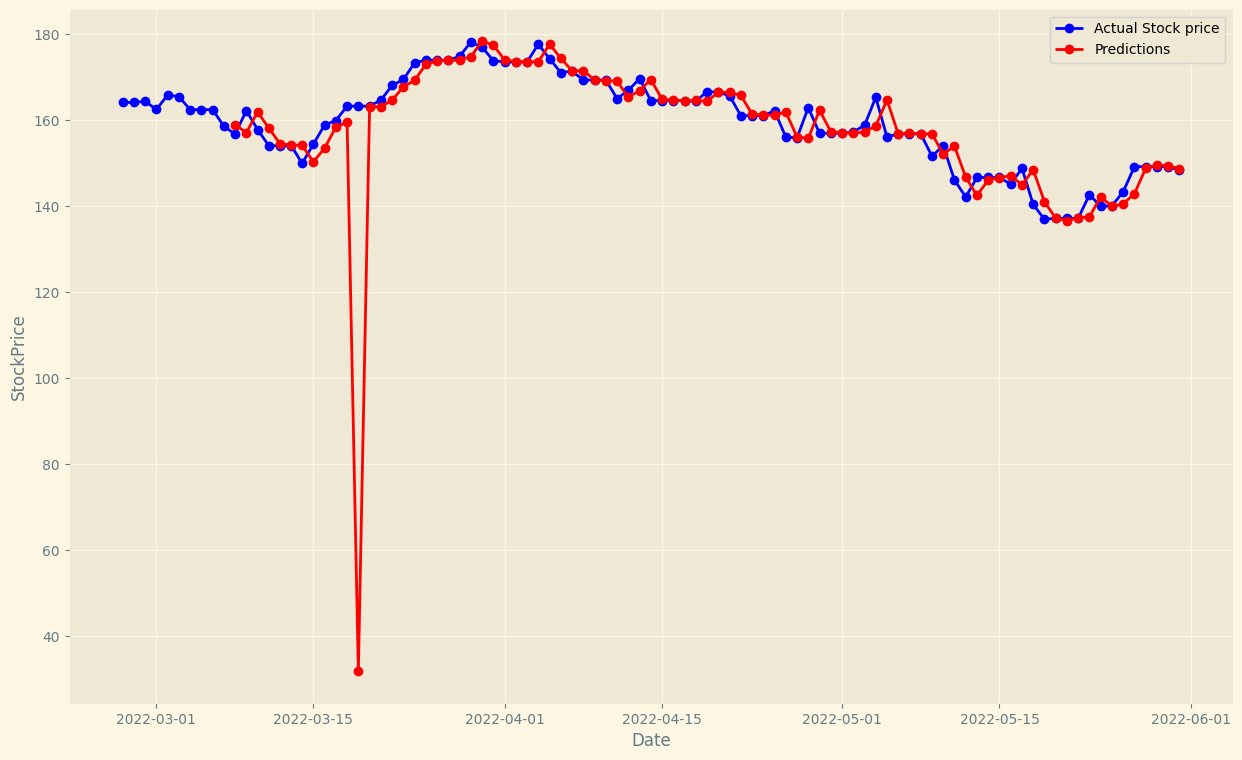

In [81]:
#close price prediction
trainData = tickerDfResample['Close'][0:1800]
testData = pd.DataFrame(tickerDfResample['Close'][1800:])
testData['Predictions'] = 0 
for i in range(len(testData)):
    model = ARIMA(trainData,order=(2,1,2))
    modelFit = model.fit()
   
    futureForcast = modelFit.forecast(20)
    futureForcast = np.mean(futureForcast)
    testData['Predictions'][i]=futureForcast
    
    trainData = trainData.append(testData['Close'][i:i+1])
    trainData = trainData[1:]
    
   
    
    
#plot for close price prediction
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,9))


plt.plot(tickerDfResample['Close'][1790:],'-bo',label='Actual Stock price')
plt.plot(testData['Predictions'],'-ro',label='Predictions')
plt.legend()
plt.xlabel("Date")
plt.ylabel("StockPrice")
plt.show() 

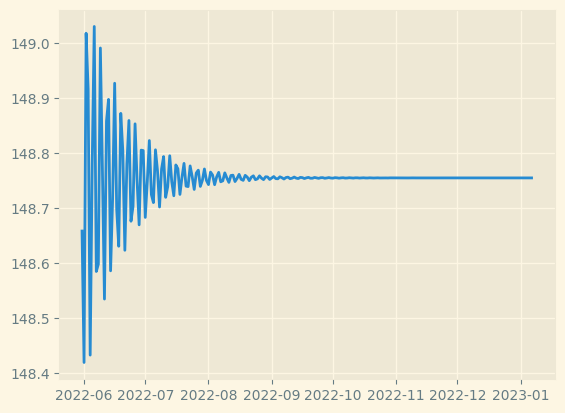

In [80]:
plt.plot(modelFit.forecast(222))

In [19]:
#Fbprophet prediction
df = pd.DataFrame(tickerDfResample['Close'][0:1250]).reset_index()
df.columns = ['ds','y']
df['ds'] = df['ds'].dt.tz_localize(None)
testData = pd.DataFrame(tickerDfResample['Close'][1250:])

model = Prophet()
model.fit(df)

15:58:36 - cmdstanpy - INFO - Chain [1] start processing
15:58:36 - cmdstanpy - INFO - Chain [1] done processing


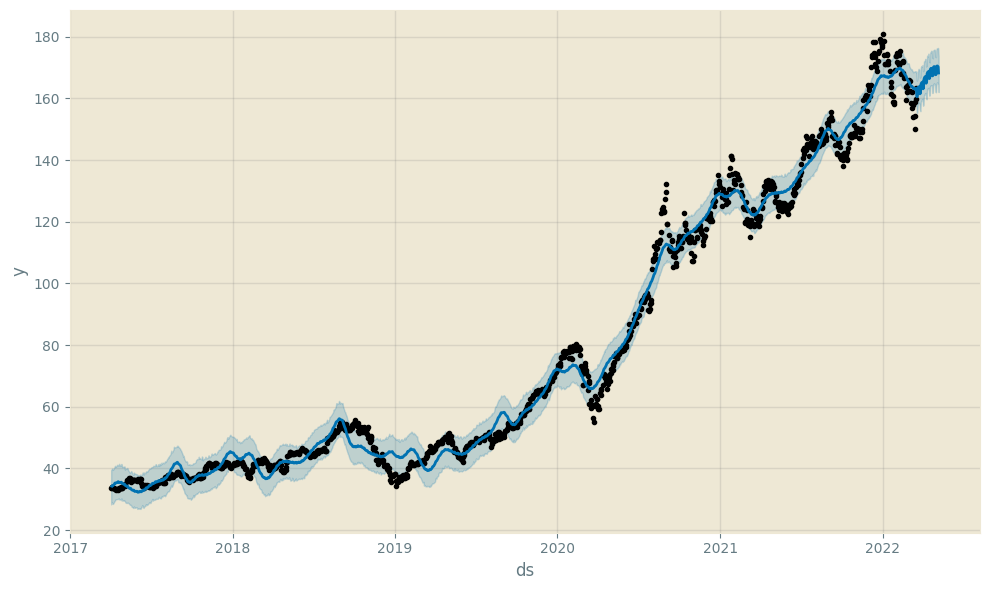

In [20]:
futureDates = model.make_future_dataframe(periods = 50)
prediction = model.predict(futureDates)
fig = model.plot(prediction)